# Decision Tree Exercises

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import graphviz
from graphviz import Graph

from env import user, password, host
from acquire import get_titanic_data
from prepare import prep_titanic

In this exercise, we'll continue working with the titanic dataset and building logistic regression models. Throughout this exercise, be sure you are training, evaluation, and comparing models on the train and validate datasets. The test dataset should only be used for your final model.

This .inpyb file will eventually be joined to model.ipynb per the curriculum instructions, but because model.ipynb needs to be rebuilt from the bottom up, I will store the solutions here for now, and copy to model.ipynb once that file is running as it should. 

### QUESTION ONE:
#### Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [2]:
df = prep_titanic()
dummy_df = pd.get_dummies(df['sex']).drop(columns=['male'])
df = pd.concat([df, dummy_df], axis=1).drop(columns=['sex'])

df.head()

,passenger_id,survived,pclass,age,sibsp,parch,fare,embarked,class,embark_town,alone,Q,S,female
0,0,0,3,22.0,1,0,7.2500,S,Third,Southampton,0,0,1,0
1,1,1,1,38.0,1,0,71.2833,C,First,Cherbourg,0,0,0,1
2,2,1,3,26.0,0,0,7.9250,S,Third,Southampton,1,0,1,1
3,3,1,1,35.0,1,0,53.1000,S,First,Southampton,0,0,1,1
4,4,0,3,35.0,0,0,8.0500,S,Third,Southampton,1,0,1,0


In [3]:
X = df[['pclass', 'age', 'sibsp', 'parch', 'fare', 'alone', 'Q', 'S', 'female']]
X['age'].fillna(inplace=True, value=X['age'].mean())
y = df[['survived']]

X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size = .20, random_state = 123, stratify=y.survived)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size = .30, random_state = 123, stratify=y_train_validate.survived)

In [4]:
print(X_train.shape)
print(X_validate.shape)
print(X_test.shape)
print(y_train.shape)
print(y_validate.shape)
print(y_test.shape)

(497, 9)
(214, 9)
(178, 9)
(497, 1)
(214, 1)
(178, 1)


[0.7847082494969819, 0.7907444668008048, 0.8189134808853119, 0.8350100603621731, 0.8571428571428571, 0.8611670020120724, 0.869215291750503, 0.8913480885311871, 0.9134808853118712, 0.9396378269617707, 0.9637826961770624, 0.9698189134808853, 0.9818913480885312, 0.9839034205231388, 0.9859154929577465, 0.9859154929577465, 0.9879275653923542, 0.9879275653923542, 0.9879275653923542, 0.9879275653923542]
The optimal max_depth is 17
The accuracy on the train data at this depth is 0.988


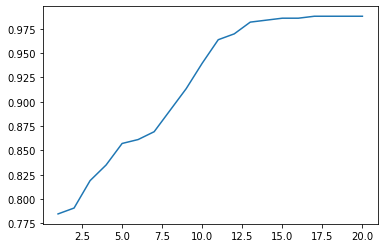

In [5]:
scores = []
for i in range(1, 21):
    tree = DecisionTreeClassifier(random_state = 1, max_depth = i)
    tree.fit(X_train, y_train)
    scores.append(tree.score(X_train, y_train))
print(scores)

max_train_accuracy = max(scores)
max_train_index = scores.index(max_train_accuracy)
optimal_train_depth = max_train_index + 1
print(f'The optimal max_depth is {optimal_train_depth}')
print(f'The accuracy on the train data at this depth is {round(max_train_accuracy, 3)}')

plt.plot(range(1,21), scores)
plt.show()

In [6]:
tree = DecisionTreeClassifier(random_state = 1, max_depth = optimal_train_depth)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_train)
y_pred[0:5]

array([0, 1, 0, 1, 1])

In [7]:
y_pred_proba = tree.predict_proba(X_train)
y_pred_proba[0:5]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

### QUESTION TWO: 
#### Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [8]:
print('Accuracy of Decision Tree classifier on training set: {:.3f}'
     .format(tree.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.988


In [9]:
confusion_matrix(y_train, y_pred)

array([[307,   0],
       [  6, 184]])

In [10]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       307
           1       1.00      0.97      0.98       190

    accuracy                           0.99       497
   macro avg       0.99      0.98      0.99       497
weighted avg       0.99      0.99      0.99       497



In [11]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(tree.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.79


In [12]:
# It appears that we are overfitting our model. By using a max_depth of 17 that was optimized for the training data, we have limited the model's ability to generalize

### QUESTION THREE:
#### Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [13]:
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(tree.score(X_test, y_test)))

y_pred_test = tree.predict(X_test)
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

Accuracy of Decision Tree classifier on test set: 0.75
[[91 19]
 [26 42]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       110
           1       0.69      0.62      0.65        68

    accuracy                           0.75       178
   macro avg       0.73      0.72      0.73       178
weighted avg       0.74      0.75      0.74       178



In [14]:
print(f'Positive is defined as not surviving; Negative is defined as surviving')
true_positive_count = confusion_matrix(y_test, y_pred_test)[0][0]
print(f'True positives: {true_positive_count}')
false_negative_count = confusion_matrix(y_test, y_pred_test)[1][0]
print(f'False negatives: {false_negative_count}')
false_positive_count = confusion_matrix(y_test, y_pred_test)[0][1]
print(f'False positives: {false_positive_count}')
true_negative_count = confusion_matrix(y_test, y_pred_test)[1][1]
print(f'True negatives: {true_negative_count}')

Positive is defined as not surviving; Negative is defined as surviving
True positives: 91
False negatives: 26
False positives: 19
True negatives: 42


### QUESTION FOUR:
#### Run through steps 2-4 using a different max_depth value.

In [15]:
tree = DecisionTreeClassifier(random_state = 1, max_depth = 5)
tree.fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.3f}'
     .format(tree.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.857


In [16]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(tree.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.79


In [17]:
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(tree.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.83


In [18]:
# Reducing the depth of the tree reduced performance on the train set but increased performance on the test set

### QUESTION FIVE: 
Which performs better on your in-sample data?

In [19]:
print(f'The optimal max_depth on the training set is {optimal_train_depth}')

The optimal max_depth on the training set is 17


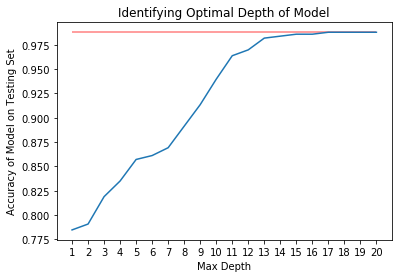

In [20]:
ax = plt.subplot(1,1,1)
ax.set_xticks(range(1,21))
plt.plot(range(1,21), scores)
plt.title('Identifying Optimal Depth of Model')
plt.ylabel('Accuracy of Model on Testing Set')
plt.xlabel('Max Depth')
plt.hlines(y=max_train_accuracy,xmin=1, xmax=20, alpha=.50, color='red')
plt.show()

In [21]:
dot_data = export_graphviz(tree, feature_names= X_train.columns, class_names= {0:'not survived', 1:'survived'},rounded=True,filled=True,out_file=None)

In [22]:
graph = graphviz.Source(dot_data) 

# graph.render(view=True)